In [103]:
import os
import numpy as np
import pathlib
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

import matplotlib.image as mpimg

## Convolutional NN
## Вичитуємо [Sea Animals](https://www.kaggle.com/datasets/vencerlanz09/sea-animals-image-dataste?select=Dolphin) 

In [104]:
# Створюємо теку для тренування
path_base_train = 'sea_animals/Train'
os.makedirs(path_base_train, exist_ok=True)

# Створюємо теку для тестування
path_base_test = 'sea_animals/Test'
os.makedirs(path_base_test, exist_ok=True)

In [105]:
#Перейменовуємо розширення картинки, щоб воно було однакове

path = os.path.join(path_base_train, 'Crabs/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'Dolphin/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

path = os.path.join(path_base_train, 'Starfish/*')
for file in glob.glob(path):
    new_file = file.replace('.JPG', '.jpg')
    os.rename(file, new_file)

In [106]:
images = pathlib.Path(path_base_train).with_suffix('')

crab_images = list(images.glob('Crabs/*.jpg'))
dol_images = list(images.glob('Dolphin/*.jpg'))
star_images = list(images.glob('Starfish/*.jpg'))

print(crab_images, dol_images, star_images)

[PosixPath('sea_animals/Train/Crabs/28396543232_fc05f2c105_b.jpg'), PosixPath('sea_animals/Train/Crabs/4936418472_1405ba31b7_o.jpg'), PosixPath('sea_animals/Train/Crabs/1324429482_53d6156c7c_b.jpg'), PosixPath('sea_animals/Train/Crabs/271040204_c74070f2fe_o.jpg'), PosixPath('sea_animals/Train/Crabs/16342000308_bdb8708946_b.jpg'), PosixPath('sea_animals/Train/Crabs/45008297404_4540e5729d_b.jpg'), PosixPath('sea_animals/Train/Crabs/3099143368_6f9dbf1531_o.jpg'), PosixPath('sea_animals/Train/Crabs/10353656476_95351b97c0_b.jpg'), PosixPath('sea_animals/Train/Crabs/5878565141_8b04c8fb81_b.jpg'), PosixPath('sea_animals/Train/Crabs/42910588140_6c3275a42b_b.jpg'), PosixPath('sea_animals/Train/Crabs/37036241591_30d4469fcc_o.jpg'), PosixPath('sea_animals/Train/Crabs/4606701432_53425fc975_b.jpg'), PosixPath('sea_animals/Train/Crabs/3257312216_3a59ecefef_o.jpg'), PosixPath('sea_animals/Train/Crabs/29889191663_17120098e0_o.jpg'), PosixPath('sea_animals/Train/Crabs/40986289560_6276c99e42_b.jpg'), Po

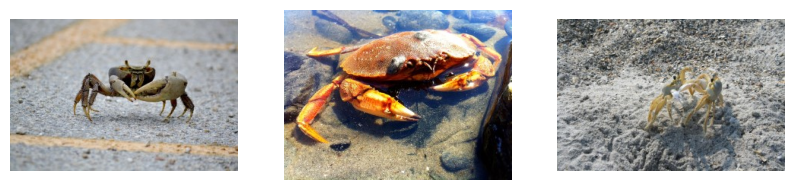

In [107]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(crab_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

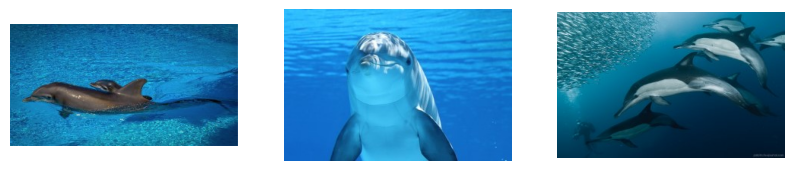

In [108]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(dol_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

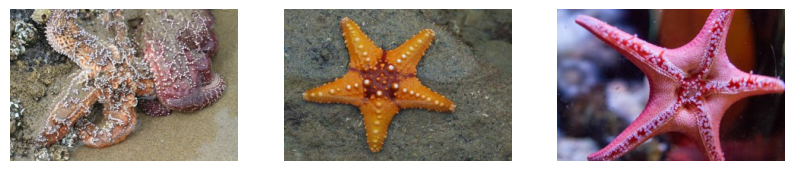

In [109]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for i, img_path in enumerate(star_images[:3]):
  img = mpimg.imread(str(img_path))
  axes[i].imshow(img)
  axes[i].axis('off')
plt.show()

In [110]:
batch_size = 16
image_height = 300
image_width = 300

In [111]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal", input_shape=(image_height, image_width, 3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ])

In [112]:
train = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="training", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=32
)

Found 1765 files belonging to 3 classes.
Using 1412 files for training.


In [113]:
class_names = train.class_names
print(class_names)

['Crabs', 'Dolphin', 'Starfish']


In [114]:
val = keras.utils.image_dataset_from_directory(
    images, 
    validation_split=0.2, 
    subset="validation", 
    seed=123, 
    image_size=(image_height, image_width), 
    batch_size=batch_size
)

Found 1765 files belonging to 3 classes.
Using 353 files for validation.


In [115]:
AUTOTUNE = tf.data.AUTOTUNE
train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

### Будуємо модель для класифікації картинок

In [116]:
model = keras.Sequential([
  data_augmentation,
  keras.layers.Rescaling(1./255),
  keras.layers.Conv2D(64, 3, strides=2, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Conv2D(128, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.3),
  keras.layers.Conv2D(256, 3, strides=2, padding='same', activation='tanh'),
  keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'),
  keras.layers.BatchNormalization(),
  keras.layers.Flatten(),
  keras.layers.Dense(256, activation='sigmoid'),
  keras.layers.Dense(3, name="outputs")
])

In [117]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential_13 (Sequential)      │ ?                         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ rescaling_7 (Rescaling)         │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_21 (Conv2D)              │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_21          │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_22 (Conv2D)              │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_22          │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dropout_7 (Dropout)             │ ?                         │          0 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ conv2d_23 (Conv2D)              │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ batch_normalization_23          │ ?                         │          0 │
│ (BatchNormalization)            │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ flatten_7 (Flatten)             │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_7 (Dense)                 │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ outputs (Dense)                 │ ?                         │          0 │
│                                 │                           │  (unbuilt) │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Хоча тут про модель нічого не вивело, але далі воно навчилося

In [118]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [119]:
model.fit(train, validation_data = val, epochs=7)

Epoch 1/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 819ms/step - accuracy: 0.7055 - loss: 1.3900 - val_accuracy: 0.5127 - val_loss: 1.2997
Epoch 2/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 806ms/step - accuracy: 0.8009 - loss: 0.4565 - val_accuracy: 0.6062 - val_loss: 0.8328
Epoch 3/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 801ms/step - accuracy: 0.8312 - loss: 0.3765 - val_accuracy: 0.7195 - val_loss: 0.6793
Epoch 4/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 36s 800ms/step - accuracy: 0.8448 - loss: 0.3593 - val_accuracy: 0.7422 - val_loss: 0.6139
Epoch 5/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 41s 795ms/step - accuracy: 0.8895 - loss: 0.2751 - val_accuracy: 0.8442 - val_loss: 0.4655
Epoch 6/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 787ms/step - accuracy: 0.8845 - loss: 0.2914 - val_accuracy: 0.8329 - val_loss: 0.5182
Epoch 7/7
45/45 ━━━━━━━━━━━━━━━━━━━━ 40s 775ms/step - accuracy: 0.9067 - loss: 0.2265 - val_accuracy: 0.8414 - val_loss: 0.4671


### Використовуємо модель для класифікації картинок на тестових картинках

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
tf.Tensor([0.09091889 0.7266498  0.18243133], shape=(3,), dtype=float32)
That's a Dolphin!
Confidence: 72.66 %.


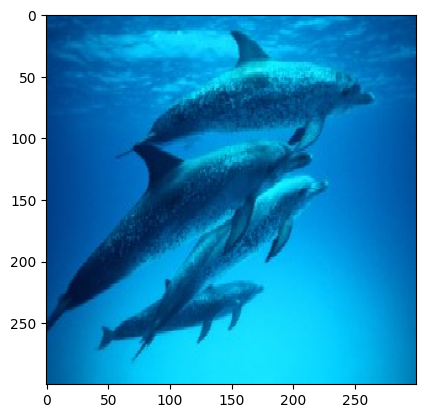

In [128]:
image = tf.keras.preprocessing.image.load_img( os.path.join(path_base_test, 'Dolphin/325762362_87b0e4e6a2_o.jpg'), target_size=((image_height, image_width)))
plt.imshow(image)

input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])

input_arr = input_arr.astype('float32') / 255.

predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])
print(score)
print("That's a {}!".format(class_names[np.argmax(score)]))
print("Confidence: {:.2f} %.".format(100 * np.max(score)))